<a href="https://colab.research.google.com/github/AlishaZaheer1/DEN_INTERNSHIP/blob/main/DEN_TASK_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
data=pd.read_csv('/content/telecom_churn.csv')
data.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


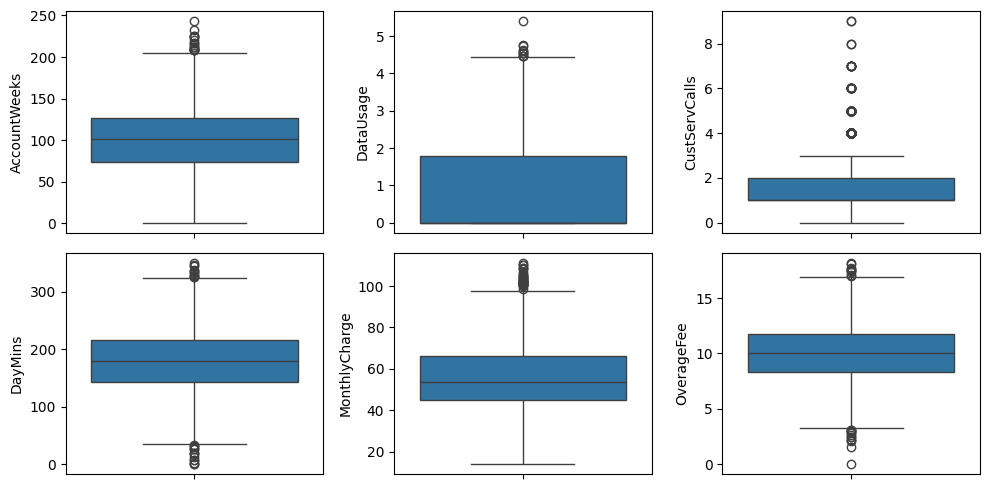

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check for outliers and distribution of numerical features
fig, axs = plt.subplots(2, 3, figsize=(10, 5))
sns.boxplot(data=data, y='AccountWeeks', ax=axs[0, 0])
sns.boxplot(data=data, y='DataUsage', ax=axs[0, 1])
sns.boxplot(data=data, y='CustServCalls', ax=axs[0, 2])
sns.boxplot(data=data, y='DayMins', ax=axs[1, 0])
sns.boxplot(data=data, y='MonthlyCharge', ax=axs[1, 1])
sns.boxplot(data=data, y='OverageFee', ax=axs[1, 2])
plt.tight_layout()
plt.show()

# Normalizing numerical columns if necessary
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
columns_to_normalize = ['AccountWeeks', 'DataUsage', 'DayMins', 'MonthlyCharge', 'OverageFee', 'RoamMins']
data[columns_to_normalize] = scaler.fit_transform(data[columns_to_normalize])


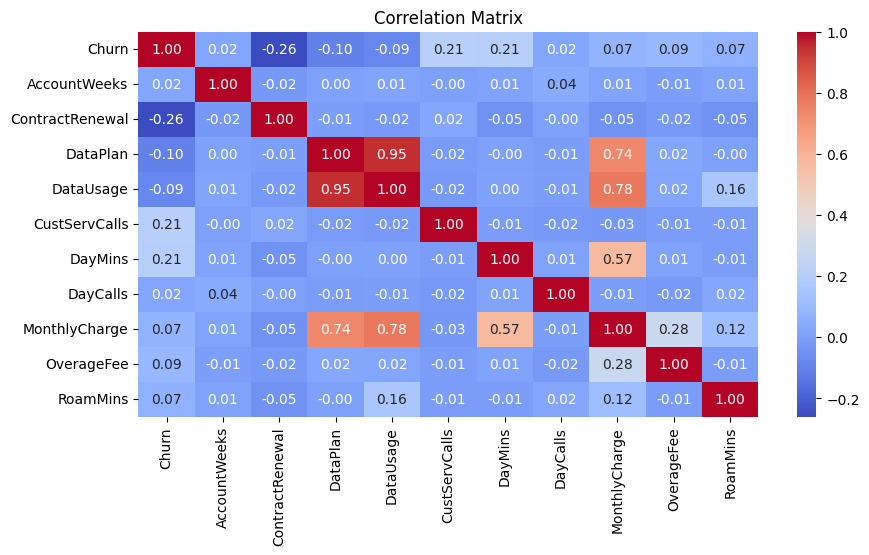

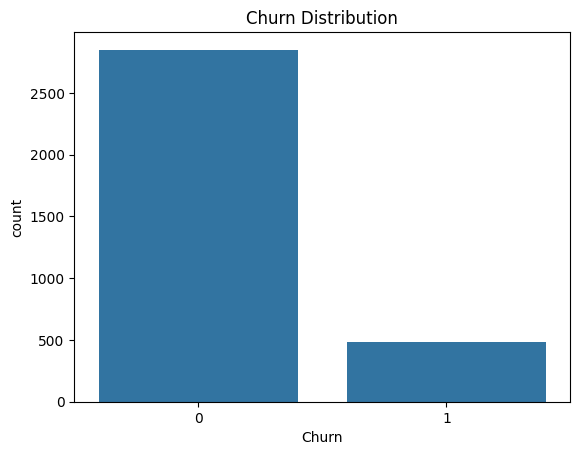

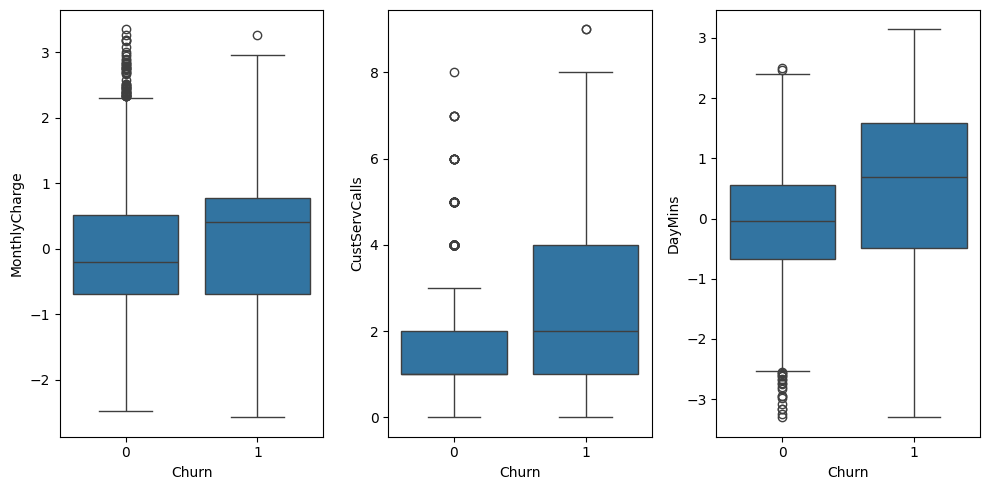

In [3]:
# Correlation matrix
plt.figure(figsize=(10, 5))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

# Distribution of the target variable (Churn)
sns.countplot(x='Churn', data=data)
plt.title("Churn Distribution")
plt.show()

# Checking the relationship between some features and churn
fig, axs = plt.subplots(1, 3, figsize=(10, 5))
sns.boxplot(data=data, x='Churn', y='MonthlyCharge', ax=axs[0])
sns.boxplot(data=data, x='Churn', y='CustServCalls', ax=axs[1])
sns.boxplot(data=data, x='Churn', y='DayMins', ax=axs[2])
plt.tight_layout()
plt.show()


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Defining features (X) and target (y)
X = data.drop('Churn', axis=1)
y = data['Churn']

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression Model
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

# Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate both models
log_pred = log_model.predict(X_test)
rf_pred = rf_model.predict(X_test)

print("Logistic Regression Results")
print(classification_report(y_test, log_pred))
print("Accuracy:", accuracy_score(y_test, log_pred))

print("\nRandom Forest Results")
print(classification_report(y_test, rf_pred))
print("Accuracy:", accuracy_score(y_test, rf_pred))


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Results
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       566
           1       0.64      0.18      0.28       101

    accuracy                           0.86       667
   macro avg       0.76      0.58      0.60       667
weighted avg       0.84      0.86      0.83       667

Accuracy: 0.8605697151424287

Random Forest Results
              precision    recall  f1-score   support

           0       0.93      0.98      0.96       566
           1       0.86      0.61      0.72       101

    accuracy                           0.93       667
   macro avg       0.90      0.80      0.84       667
weighted avg       0.92      0.93      0.92       667

Accuracy: 0.9265367316341829
